# Audrey's Final Project: Genetic Drift & Selection

Here, I plan to build upon the pandemic/vaccine model that we've been working with for the past few weeks. Starting with the initial virus that we built together, I want to change two parameters: probability of infection and infection period. The two will contradict each other in that a high value for one parameter will be accompanied by a lower value for the other, and vice versa. Different generations of ther network will initially experience random values of each parameter, but the model will eventually select for higher values of one parameter and lower values of the other.

In [1]:
#importing all the necessary packages to run the model
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
#previously defined elements of the "graph" class. 
class Graph():
    def __init__(self):
        self.gdict = {}
        self.val = {}
        
    def add_node(self, node, val= None):
        if node not in self.gdict:
            self.gdict[node] = []
        self.val[node] = val
        
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
       
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
    
    def delete_node(self, doomed_node):
        if doomed_node not in self.gdict:
            raise KeyError(f"cannot delete {doomed_node}; it doesn't exist!")
            for other_node in self.gdict[doomed_node]:
                self.gdict[other_node].remove(doomed_node)
            del self.gdict[doomed_node]
            del self.values[doomed_node]
    
    def delete_edge(self, node1, node2):
        if node1 not in self.gdict[node2]: return 
        self.gdict[node1].remove(node2)
        self.gdict[node2].remove(node1)
        
    def get_nodes(self):
        """list of nodes"""
        return list(self.gdict.keys()) 
    
    def get_edges(self):
        """list of edges"""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
    
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        GREEN = (0, 0.8, 0.5)
        YELLOW = (0.5, 0.5, 0.5)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.val[nodes[i]] is not None:
                if self.val[nodes[i]][0] == 'healthy':
                    colors.append(BLUE)
                elif self.val[nodes[i]][0] == 'infected':
                    colors.append(RED)
                elif self.val[nodes[i]][0] == 'vaccinated':
                    colors.append(YELLOW)
                else:
                    colors.append(GREEN)
            else:
                colors.append(BLUE)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)

In [3]:
def degrees(g):
    """plots how many nodes have a given number of degrees (histogram)"""
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))

    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    
    plt.plot(hist,'.-');
    plt.xlabel('degrees')
    plt.ylabel('frequency')
    
    return hist

In [4]:
def barabasi(n_nodes = 9):
    """the network we use–follows the formula n edges = 2 * n nodes"""
    g = Graph()
    degrees = np.zeros(n_nodes)
    nodes = np.array(range(n_nodes))
    
    for i in range(n_nodes):
        if i == 0:
            g.add_node(0)
        elif i == 1:
            g.add_edge(1,0)
            degrees[0] = 1
            degrees[1] = 1
        else:
            connections = np.random.choice(nodes[:i], size = 2, replace = False, p=degrees[:i]/np.sum(degrees))
            for node in connections:
                g.add_edge(i, node)
                degrees[node] += 1
            degrees[i] = 2
        #print(i, "nodes:", nodes, "degrees:", degrees)
    return g

#g = barabasi(20)
#plt.figure(figsize=(12,4))
#plt.subplot(121)
#g.plot()
#plt.subplot(122)
#degrees(g)

/Users/audreyrussell/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


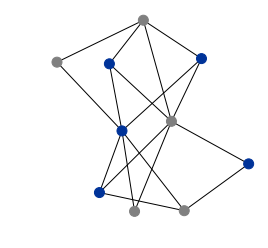

In [5]:
def vaccinate(g, vax_rate = 0, preference = 1):
    '''distribute vaccination status. preference == 1 means no assortativity'''
    nodes = g.get_nodes()
    n_to_vaccinate = int(len(nodes) * vax_rate)
    #np.random.choic
    prob = np.ones(len(nodes)) / len(nodes)
    for node in nodes:
        prob[node] = 1
    for i in range(n_to_vaccinate):
        p = []
        for node in nodes:
            p.append(prob[node])
        target_node = np.random.choice(nodes, p = p/np.sum(p))
        g.val[target_node] = ['vaccinated', 0]
        for friend in g.gdict[node]:
            prob[friend] *= preference
        nodes.remove(target_node)
    for node in nodes:
        g.val[node] = ['healthy', 0]
g = barabasi(10)
vaccinate(g, vax_rate = 0.5)
plt.figure(figsize = (3,3))
g.plot()
#print(measure_assortativity(g))

In [6]:
print(g.val)

{0: ['vaccinated', 0], 1: ['vaccinated', 0], 2: ['healthy', 0], 3: ['healthy', 0], 4: ['healthy', 0], 5: ['healthy', 0], 6: ['vaccinated', 0], 7: ['vaccinated', 0], 8: ['vaccinated', 0], 9: ['healthy', 0]}


In [7]:
def measure_assortativity(g):
    """calculates the probability that connected nodes share the same assortativity value"""
    count = 0
    edges = g.get_edges()
    for edge in edges:
        if g.val[edge[0]][0]==g.val[edge[1]][0]:
            #print(g.values[edge[0]][0],g.values[edge[1]][0])
            count += 1
    return count/len(edges)

measure_assortativity(g)

0.35294117647058826

In [8]:
def pandemic(g, prob, nsteps, infect_period, reinitialize=True):
    """runs the pandemic. """
    nodes = g.get_nodes()
    if reinitialize:
        susceptible = []
        for node in nodes:
            if g.val[node][0]=='healthy':
                susceptible.append(node)
        patient_zero = np.random.choice(susceptible)
        g.val[patient_zero] = ['infected', 0] 

    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        is_active = False
        for node in nodes:
            if g.val[node][0] == 'infected':         
                is_active = True
                if g.val[node][1] == infect_period:
                    g.val[node][0] = 'immune'
                else:
                    g.val[node][1] += 1                  
                    neighbors = g.gdict[node]
                    for neighbor in neighbors:
                        if g.val[neighbor][0]=='healthy' and np.random.uniform()<prob:
                            newly_infected.append(neighbor)
        if not is_active:
            return history
        for node in newly_infected:
            g.val[node] = ['infected', 0]
        history[t] = len(newly_infected)
    return history

#g = barabasi(20)
#plt.figure(figsize=(12,6))
#for i in range(8):
#    if i==0:
#        vaccinate(g, 0.5, 1)
#        pandemic(g, prob=0.5, nsteps=1, infect_period=1)
#    else:
#        pandemic(g, prob=0.5, nsteps=1, infect_period=1, reinitialize=False)
#    plt.subplot(2,4,i+1)
#    g.plot()
#   plt.title(i)


In [9]:
print(g.val)

{0: ['vaccinated', 0], 1: ['vaccinated', 0], 2: ['healthy', 0], 3: ['healthy', 0], 4: ['healthy', 0], 5: ['healthy', 0], 6: ['vaccinated', 0], 7: ['vaccinated', 0], 8: ['vaccinated', 0], 9: ['healthy', 0]}


Here is the experiment, where I will run several generations of the pandemic. As generations pass, favorable values for the pandemic–that is, either higher infectiousness with shorter infection period or lower infectiousness with longer infection period–will start to become more common. My graph will depict the progression of each value as generations pass.

In [11]:

#constants:
N_STEPS = 20
N_NODES = 100
VAX_RATE = 0.5
N_PARAM_STEPS = 10 #goes through x many values
N_TRIALS = 100 #for each combination of parameters

#counters:
history = np.zeros(shape = (N_STEPS, N_TRIALS*N_PARAM_STEPS))
total_infected = np.zeros(shape = (N_TRIALS, N_PARAM_STEPS))

#variable parameters
prob = np.zeros(N_PARAM_STEPS)
infect_period = np.zeros(N_PARAM_STEPS)

print(g.val)

for iparam in range(N_PARAM_STEPS):
    for itrial in range(N_TRIALS):
        g = barabasi(N_NODES)
        prob[iparam] = np.random.uniform(0.1, 0.9)
        if prob[iparam] > 0.5:
            infect_period[iparam] = np.random.uniform(low = 0.1, high = 0.5)
        else:
            infect_period[iparam] = np.random.uniform(low = 0.5, high = 0.9)
        history[:,itrial + iparam * N_TRIALS] = pandemic(g, prob = prob,
                                                        nsteps = N_STEPS, infect_period = infect_period)
        if history[iparam - 1] > history[iparam]:
            prob[iparam + 1] = prob[iparam-1]
        else:
            prob[iparam + 1] = prob[iparam]
        count_infected = 0
        for node, val in g.val.items():
            if val[0] == 'immune' or val[0] == 'infected':
                count_infected += 1
        total_infected[itrial, iparam] = count_infected
        


{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None, 50: None, 51: None, 52: None, 53: None, 54: None, 55: None, 56: None, 57: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 65: None, 66: None, 67: None, 68: None, 69: None, 70: None, 71: None, 72: None, 73: None, 74: None, 75: None, 76: None, 77: None, 78: None, 79: None, 80: None, 81: None, 82: None, 83: None, 84: None, 85: None, 86: None, 87: None, 88: None, 89: None, 90: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 97: None, 98: None, 99: None}


TypeError: 'NoneType' object is not subscriptable

In [51]:
print(g.val)

{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None, 50: None, 51: None, 52: None, 53: None, 54: None, 55: None, 56: None, 57: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 65: None, 66: None, 67: None, 68: None, 69: None, 70: None, 71: None, 72: None, 73: None, 74: None, 75: None, 76: None, 77: None, 78: None, 79: None, 80: None, 81: None, 82: None, 83: None, 84: None, 85: None, 86: None, 87: None, 88: None, 89: None, 90: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 97: None, 98: None, 99: None}


In [8]:
plt.figure(figsize = (12,5))
for iparam in range(N_PARAM_STEPS):
    plt.plot(N_PARAM_STEPS, prob, N_PARAM_STEPS, infect_period, axis=1), label=prob[iparam] and infect_period[iparam] #i know this isn't right);
plt.xlabel("trial");
plt.ylabel("value");
plt.legend(loc = 'upper right')

SyntaxError: can't assign to function call (<ipython-input-8-f5f0b2d9474c>, line 3)